In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load and visualise data

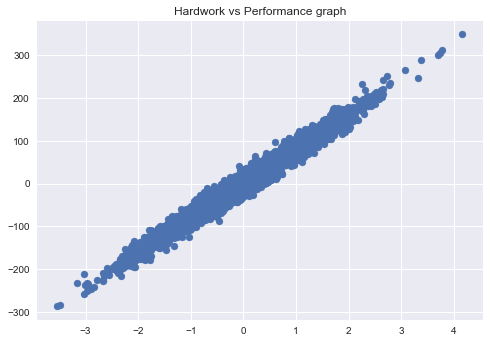

In [22]:
dfx = pd.read_csv('C:/Users/Abhishek Singh/Desktop/ML/Data_Science/Datasets/Hardwork pays off/Linear_X_Train.csv')
dfy = pd.read_csv('C:/Users/Abhishek Singh/Desktop/ML/Data_Science/Datasets/Hardwork pays off/Linear_Y_Train.csv')

X = dfx.values
Y = dfy.values

#Normalisation
u = X.mean()
std = X.std()
X = (X-u)/std

plt.style.use('seaborn')
plt.scatter(X,Y)
plt.title("Hardwork vs Performance graph")
plt.show()


### Linear Regression

In [32]:
def hypothesis(x,theta):
    return (theta[0] + theta[1]*x)

def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        yx = hypothesis(X[i],theta)
        grad[0] += (yx - Y[i])
        grad[1] += (yx - Y[i])*X[i]
    return grad

def error(X,Y,theta):
    m = X.shape[0]
    err = 0
    for i in range(m):
        yx = hypothesis(X[i],theta)
        err += (yx - Y[i])**2
    return err

def gradient_descent(X,Y,learning_rate=0.0001,init_steps = 1,max_steps = 80):
    theta = np.zeros((2,))
    error_list = []
    while(init_steps<max_steps):
        grads = gradient(X,Y,theta)
        theta[0] = theta[0] - learning_rate*grads[0]
        theta[1] = theta[1] - learning_rate*grads[1]
        total_error = error(X,Y,theta)
        error_list.append(total_error)
        init_steps += 1
    return theta,error_list

[ 0.68386897 79.90573694]


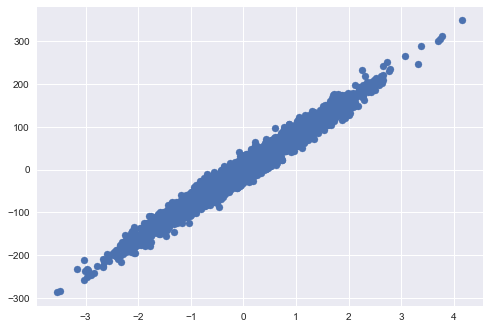

In [35]:
theta,error_list = gradient_descent(X,Y)
print(theta)



In [37]:
X_test = pd.read_csv("C:/Users/Abhishek Singh/Desktop/ML/Data_Science/Datasets/Hardwork pays off/Linear_X_Test.csv")
X_test = X_test.values

def prediction(X_test,theta):
    return theta[0] + theta[1]*X_test

In [38]:
Y_pred = prediction(X_test,theta)
y =  pd.DataFrame(data=Y_pred,columns=["y"]) 
y.to_csv("output.csv",index = False)